<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISE-291-Term-Project" data-toc-modified-id="ISE-291-Term-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ISE 291 Term Project</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li><li><span><a href="#Task-9" data-toc-modified-id="Task-9-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Task-9</a></span></li><li><span><a href="#Task-10" data-toc-modified-id="Task-10-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Task-10</a></span></li><li><span><a href="#Task-11" data-toc-modified-id="Task-11-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Task-11</a></span></li></ul></li></ul></div>

# ISE 291 Term Project 

Group Number = 49  

Group Members:

  Wael Ali Al-Qoozi    ,201924670
  Abdulbari Alshahrani ,201969730
  Mohammed Alsabaa     ,201960790

## Task-1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#Get the raw data
df = pd.read_csv('Group49/Group_49_A.csv', delimiter = ',')
display(df.info())
#display(df.head())

#Identify the columns containing null values
null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)
#fill NaN values
# 1- Loop over null_columns and change their null values with appropriate ones
for c in null_columns:
    if(c=="Renovate"):
        value=0    
    elif(c=="Contour"): #Set Nan Values to Not Applicable
        value="Not Applicable" #Set Nan Values to Not Applicable
        #sample=df["Type"]=="open land"
    elif(c=="Garage"):#Set Nan Values to Not Applicable
        value="Not Applicable"
    elif(c=="Swimming"):#Set Nan Values to Not Applicable
        value="Not Applicable"
    df[c].fillna(value,inplace=True)

#**********************************Cleaning The data**********************************
#This line handles the proximity inconsisties, by getting rid of any text, and then converting it to integer.
df["Proximity"]=df["Proximity"].apply(lambda x : int(x.replace("mts","")))
df["Type"]=df["Type"].apply(lambda x: x.replace("land","open land") if(x=="land") else x)
#This line handles the purchase-date inconsisties.
#-> the problem is that some of the data have the year or purchase written in two digits. So, by comparing the last two digit two a number less than say 21, we can find that if the result is false, then the year that begins with 20 would be the only choice to fill the missing two digits, and if true, then it would a year that begins with 19. 
df["Purchase-Date"]=df["Purchase-Date"].apply(
    lambda x: x if(len(x[x.index("-"):-1]))==4 
else x[:x.index("-")]+"-"+"19"+x[x.index("-"):].replace("-","")
 if((int(x[x.index("-"):].replace("-",""))>21))
  else x[:x.index("-")]+"-"+"20"+x[x.index("-"):].replace("-",""))
#Remove the outliers
# Loop over the numerical columns searching for any outliers, and remove them if any using the IQR method.
# The IQR method is to get the max and the min quartiles, and replace them with null values, and finally drop the null values, that is the outliers.
for c in {"Sale-Price","Purchase-Price","U-Index","N-Rank","P-Chance","Proximity","Built","Renovate","Crime-Rate","C-Rating","Gov-Index"}: 
             q75,q25 = np.percentile(df.loc[:,c],[75,25])
             intr_qr = q75-q25
             max = q75+(1.5*intr_qr)
             min = q25-(1.5*intr_qr)
             df.loc[df[c] < min,c] = np.nan
             df.loc[df[c] > max,c] = np.nan
             df=df.dropna(axis=0)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
Sale-Price        3000 non-null float64
Purchase-Date     3000 non-null object
Purchase-Price    3000 non-null float64
Type              3000 non-null object
Class             3000 non-null object
Location          3000 non-null object
Shape             3000 non-null object
U-Index           3000 non-null int64
Proximity         3000 non-null object
N-Rank            3000 non-null int64
P-Chance          3000 non-null float64
Built             3000 non-null int64
Renovate          2781 non-null float64
Access            3000 non-null object
Crime-Rate        3000 non-null int64
C-Rating          3000 non-null int64
Gov-Index         3000 non-null int64
Contour           783 non-null object
Garage            2217 non-null object
Swimming          729 non-null object
dtypes: float64(4), int64(6), object(10)
memory usage: 468.8+ KB


None

Columns with NaN values are: Index(['Renovate', 'Contour', 'Garage', 'Swimming'], dtype='object')


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,8010.2,May-1991,11964.1,villa,residential,Center,trapezoid,5.0,8751.0,5.0,0.889105,1975.0,1985.0,street,91.0,5.0,8.0,Not Applicable,Yes,No
1,13129.0,May-1985,8920.3,open land,commercial,Outskirts,irregular,1.0,69430.0,6.0,0.560399,1970.0,0.0,highway,82.0,3.0,1.0,C,Not Applicable,Not Applicable
2,8372.8,December-1972,11195.8,villa,residential,Center,rectangle,5.0,7967.0,8.0,0.951408,1970.0,0.0,alley,36.0,4.0,7.0,Not Applicable,Yes,Yes
3,13830.8,September-2005,7807.3,duplex,commercial,Center,irregular,1.0,18453.0,7.0,0.709128,1990.0,2000.0,street,76.0,5.0,6.0,Not Applicable,Yes,Not Applicable
4,12534.5,October-1988,1731.7,open land,residential,Border,irregular,5.0,33845.0,3.0,0.028211,1985.0,0.0,highway,39.0,4.0,5.0,C,Not Applicable,Not Applicable


## Task-2

<Figure size 432x288 with 0 Axes>

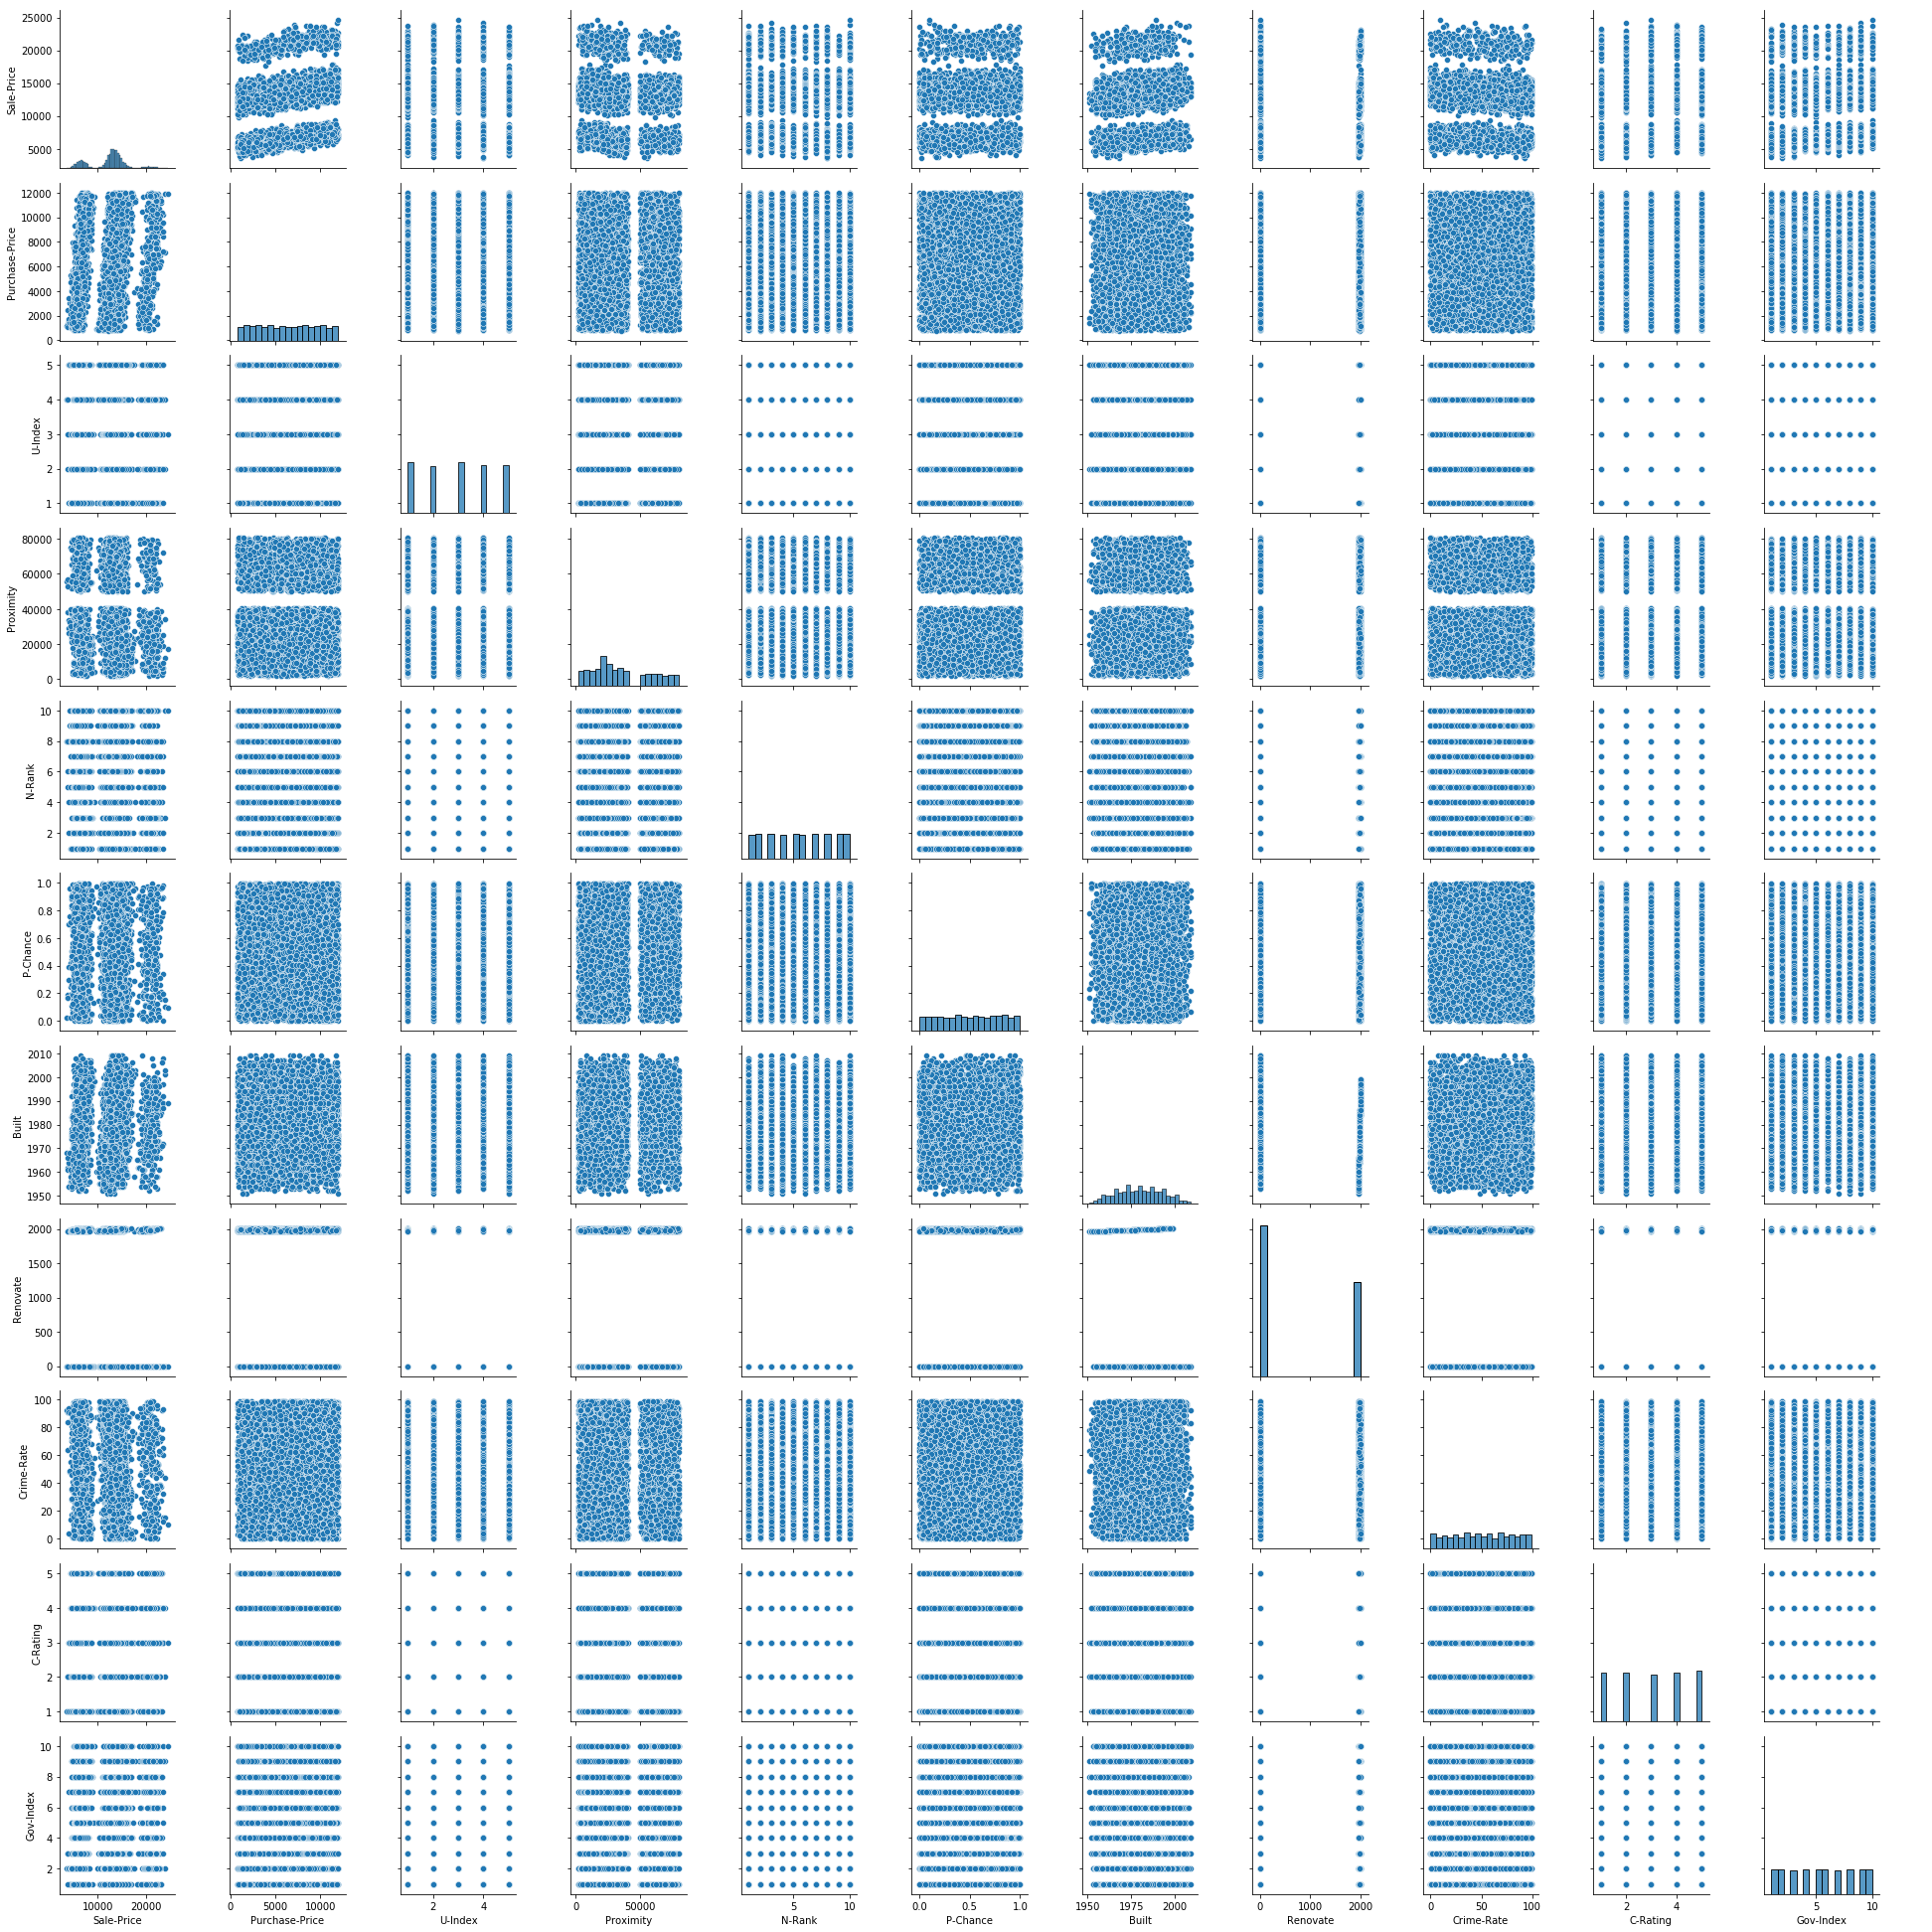

In [2]:
#display(df.sample(40))
#sample=((df["Type"]!="villa")&(df["Swimming"]!="Not Applicable"))
# you need to fix Contour  column, it does not function right!
#display(df[sample])
#display(df[sample])

df = pd.read_csv('Group49/Group_49_B.csv', delimiter = ',')
#sns.pairplot(df)
import matplotlib.pyplot as plt
import seaborn as sns

#num_columns=df.select_dtypes(exclude='object').columns

plt.figure()
sns.pairplot(data=df)
plt.show()

#for c in df.select_dtypes(include="object"):
#sns.pairplot(df,y_vars=["Sale-Price"],x_vars=df.select_dtypes(include="object"))

## Task-3

In [3]:
num_columns = df.select_dtypes(exclude='object').columns #Get the numerical columns.


from sklearn.linear_model import LinearRegression
import numpy as np


num_columns=df.select_dtypes(exclude='object').columns

# Calculate the correlation among all score columns
corr = df.loc[:,num_columns].corr()

# Identify top 3 variables that are highly correlated with 'Sale-Price' column
corr=corr.apply(lambda x: np.abs(x))
sorted_corr = corr.sort_values(by=['Sale-Price'], ascending=False) # negative values will be considered using abs.

top_3 = sorted_corr['Sale-Price'].index[1:4].tolist()
print('The top 3 variables that are highly correlated with Sale-Price: ', top_3)
# Identify bottom 3 variables that are highly correlated with 'Sale-Price' column
bottom_3 = sorted_corr['Sale-Price'].index[7:-1].tolist()
print('The bottom 3 variables that are highly correlated with Sale-Price: ', bottom_3)



The top 3 variables that are highly correlated with Sale-Price:  ['Renovate', 'Purchase-Price', 'Built']
The bottom 3 variables that are highly correlated with Sale-Price:  ['N-Rank', 'P-Chance', 'U-Index']


## Task-4

<Figure size 432x288 with 0 Axes>

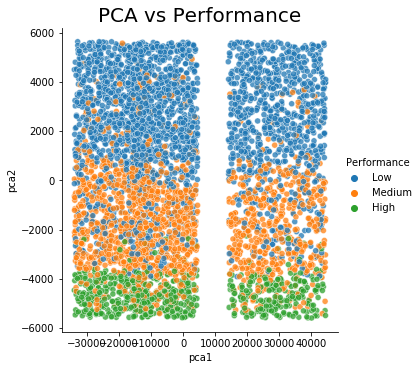

The graph shows a good speration, with some overlap.
The variance captured by pca 1 is:  97.81%
The variance captured by pca 2 is:  2.01%


In [4]:

num_columns=df.select_dtypes(exclude="object").columns
pca_input_columns=num_columns.drop(['Sale-Price'])
df["Performance"]=((df.loc[:,"Sale-Price"]-df.loc[:,"Purchase-Price"])*100/df.loc[:,"Purchase-Price"])
df["Performance"]=df["Performance"].apply(lambda x: "Low" if(x<=100) else ("High" if(x>=400) else "Medium"))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[pca_input_columns]) # get two components
df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]

plt.figure()
sns.relplot(x='pca1',y='pca2',
            hue='Performance',
            kind='scatter',
            height=5, aspect=1,alpha=0.75,
            data=df)
plt.title('PCA vs Performance', fontsize = 20)
plt.show()
print("The graph shows a good speration, with some overlap.")
for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')
df=df.drop(columns=['pca1', 'pca2'])

## Task-5

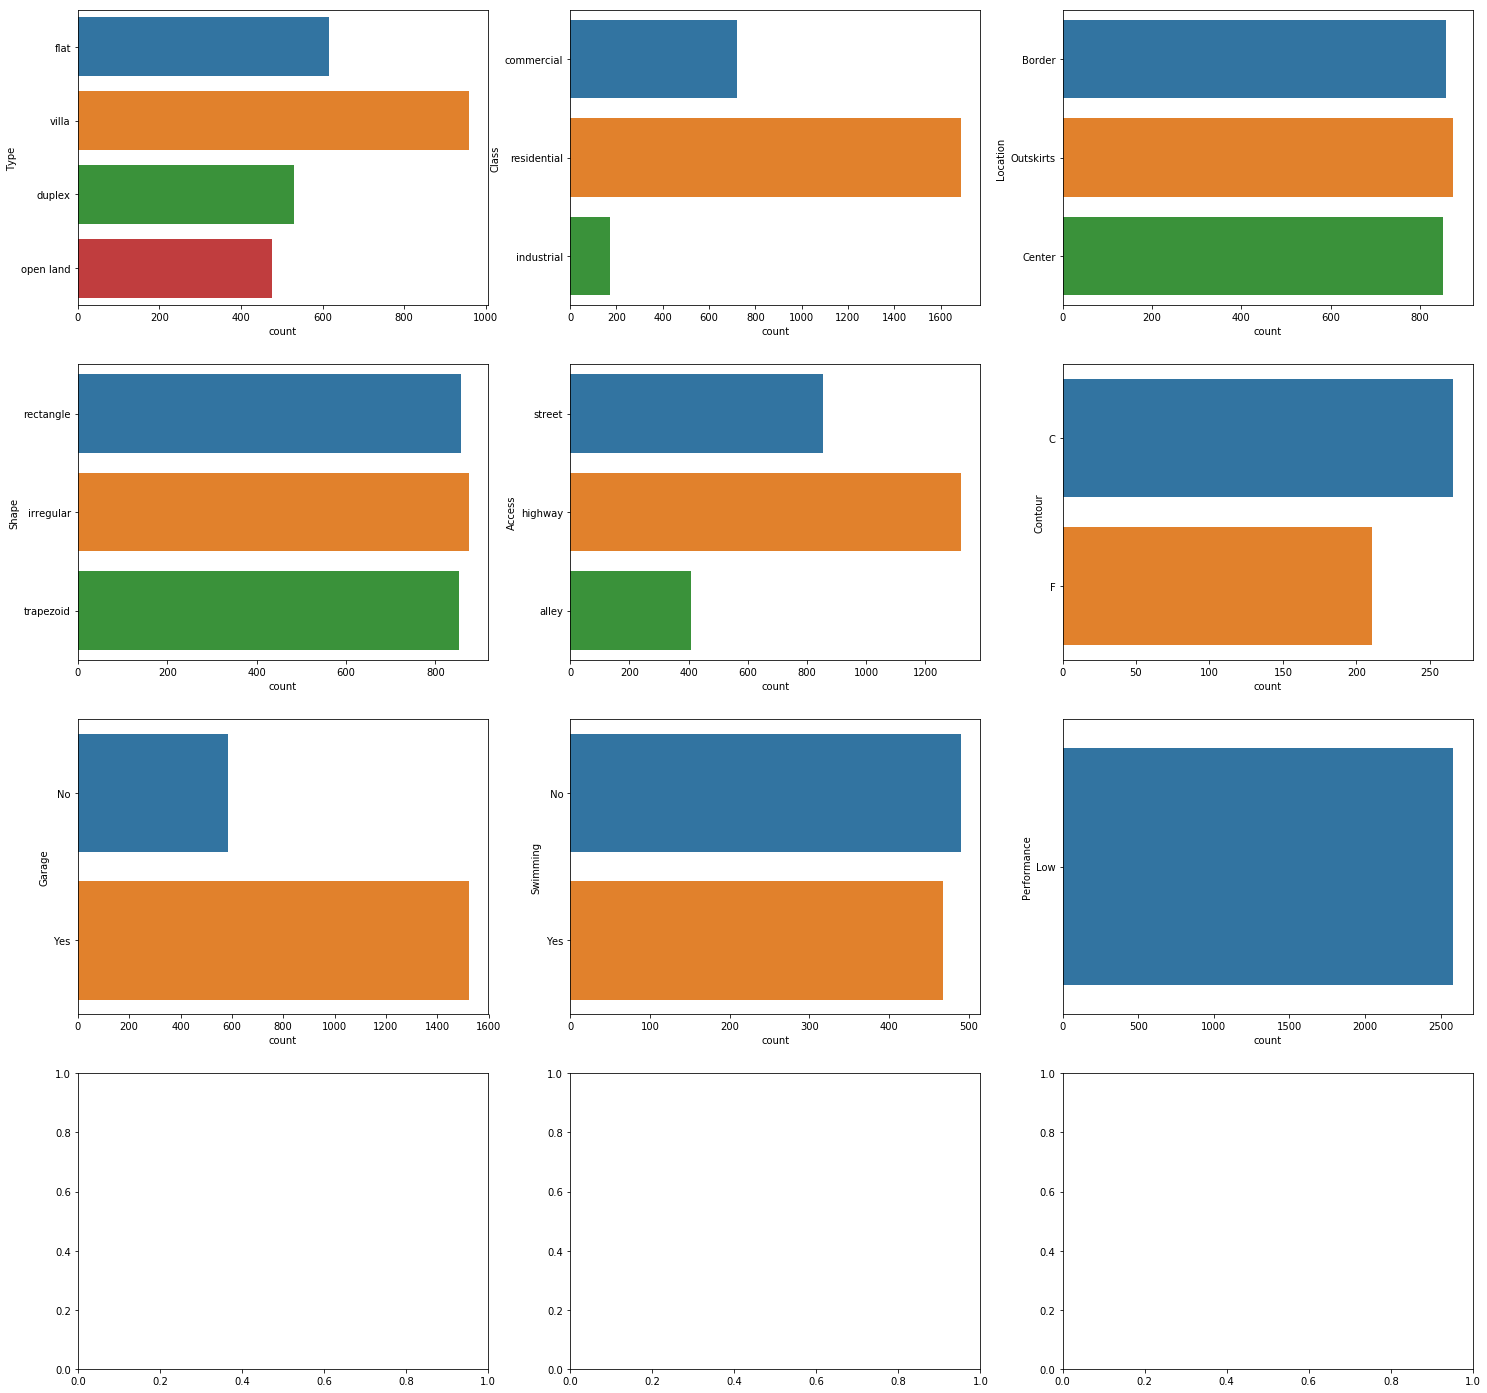

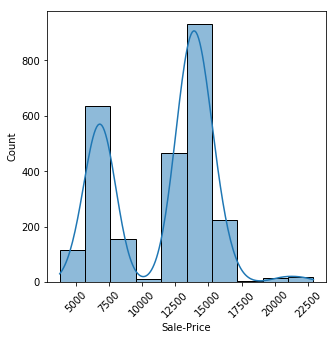

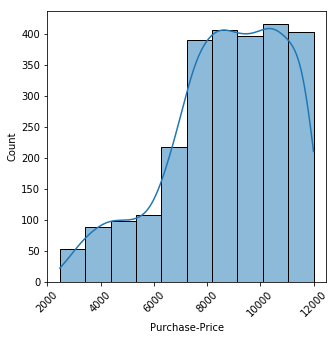

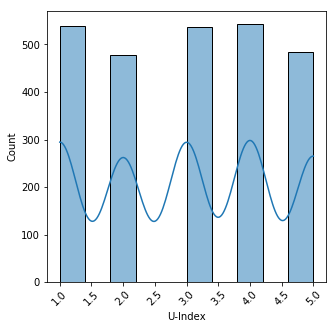

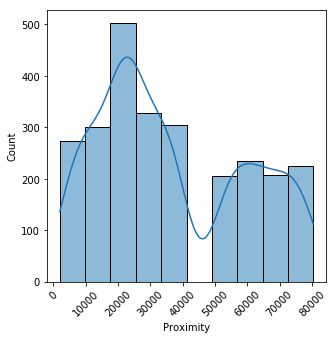

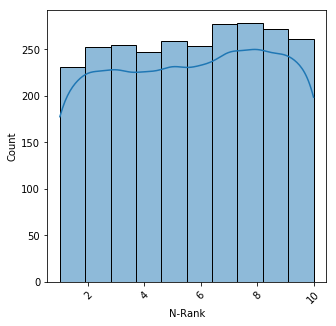

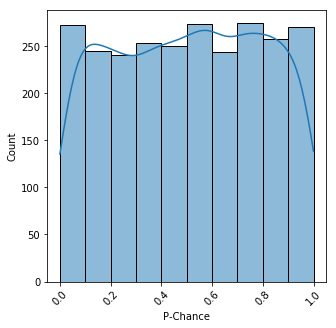

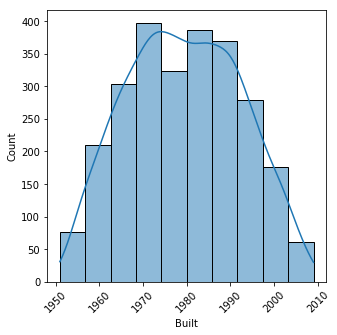

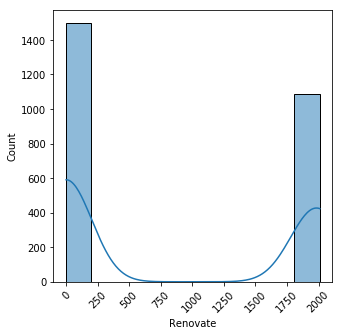

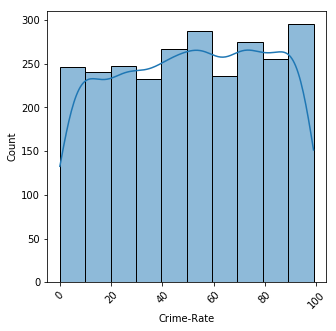

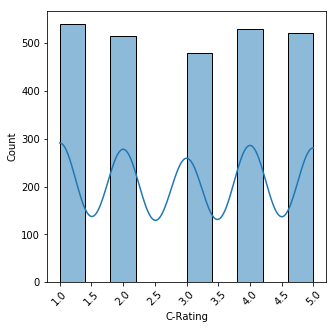

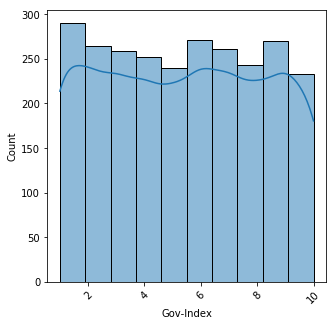

According to the plots,
 1): The majority of low performing estates are Villas.
 2): The vast majority of low performing estates are residential and commercial.
 3): Most of low performing estates have sale price of around 15,000-7,500 Mil SAR, and purchase price of the range (more than 2,000 to less than 12,000) Mil SAR.
 4): Most of the low performing estates were built in the period from 1960 to 2000.
 5): Most of low performing estates are accesible through high-ways, and street.
 6): The vast majority of low performing estates have garages. 
 7): Most of low performing estates have irregular slope of their property.
 


In [5]:
#Introduce new column: Performance (Has two values, either low or high)
location_c=df.loc[:,"Performance"]
low_performance_estates=df[location_c=="Low"]
low_performance_estates=low_performance_estates.drop(columns=['Purchase-Date'])
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
num_columns = low_performance_estates.select_dtypes(exclude='object').columns
cat_columns = low_performance_estates.select_dtypes(include='object').columns
nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of corresponding rows 
## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=low_performance_estates,ax=axes.flatten()[ind])
plt.show()
for col in num_columns:
    plt.figure(figsize=(5,5))
    sns.histplot(x=col,bins=10,kde=True,data=low_performance_estates)
    plt.xticks(rotation=45)
    plt.show()
print(f"According to the plots,\n 1): The majority of low performing estates are Villas.\n 2): The vast majority of low performing estates are residential and commercial.\n 3): Most of low performing estates have sale price of around 15,000-7,500 Mil SAR, and purchase price of the range (more than 2,000 to less than 12,000) Mil SAR.\n 4): Most of the low performing estates were built in the period from 1960 to 2000.\n 5): Most of low performing estates are accesible through high-ways, and street.\n 6): The vast majority of low performing estates have garages. \n 7): Most of low performing estates have irregular slope of their property.\n ")

## Task-6

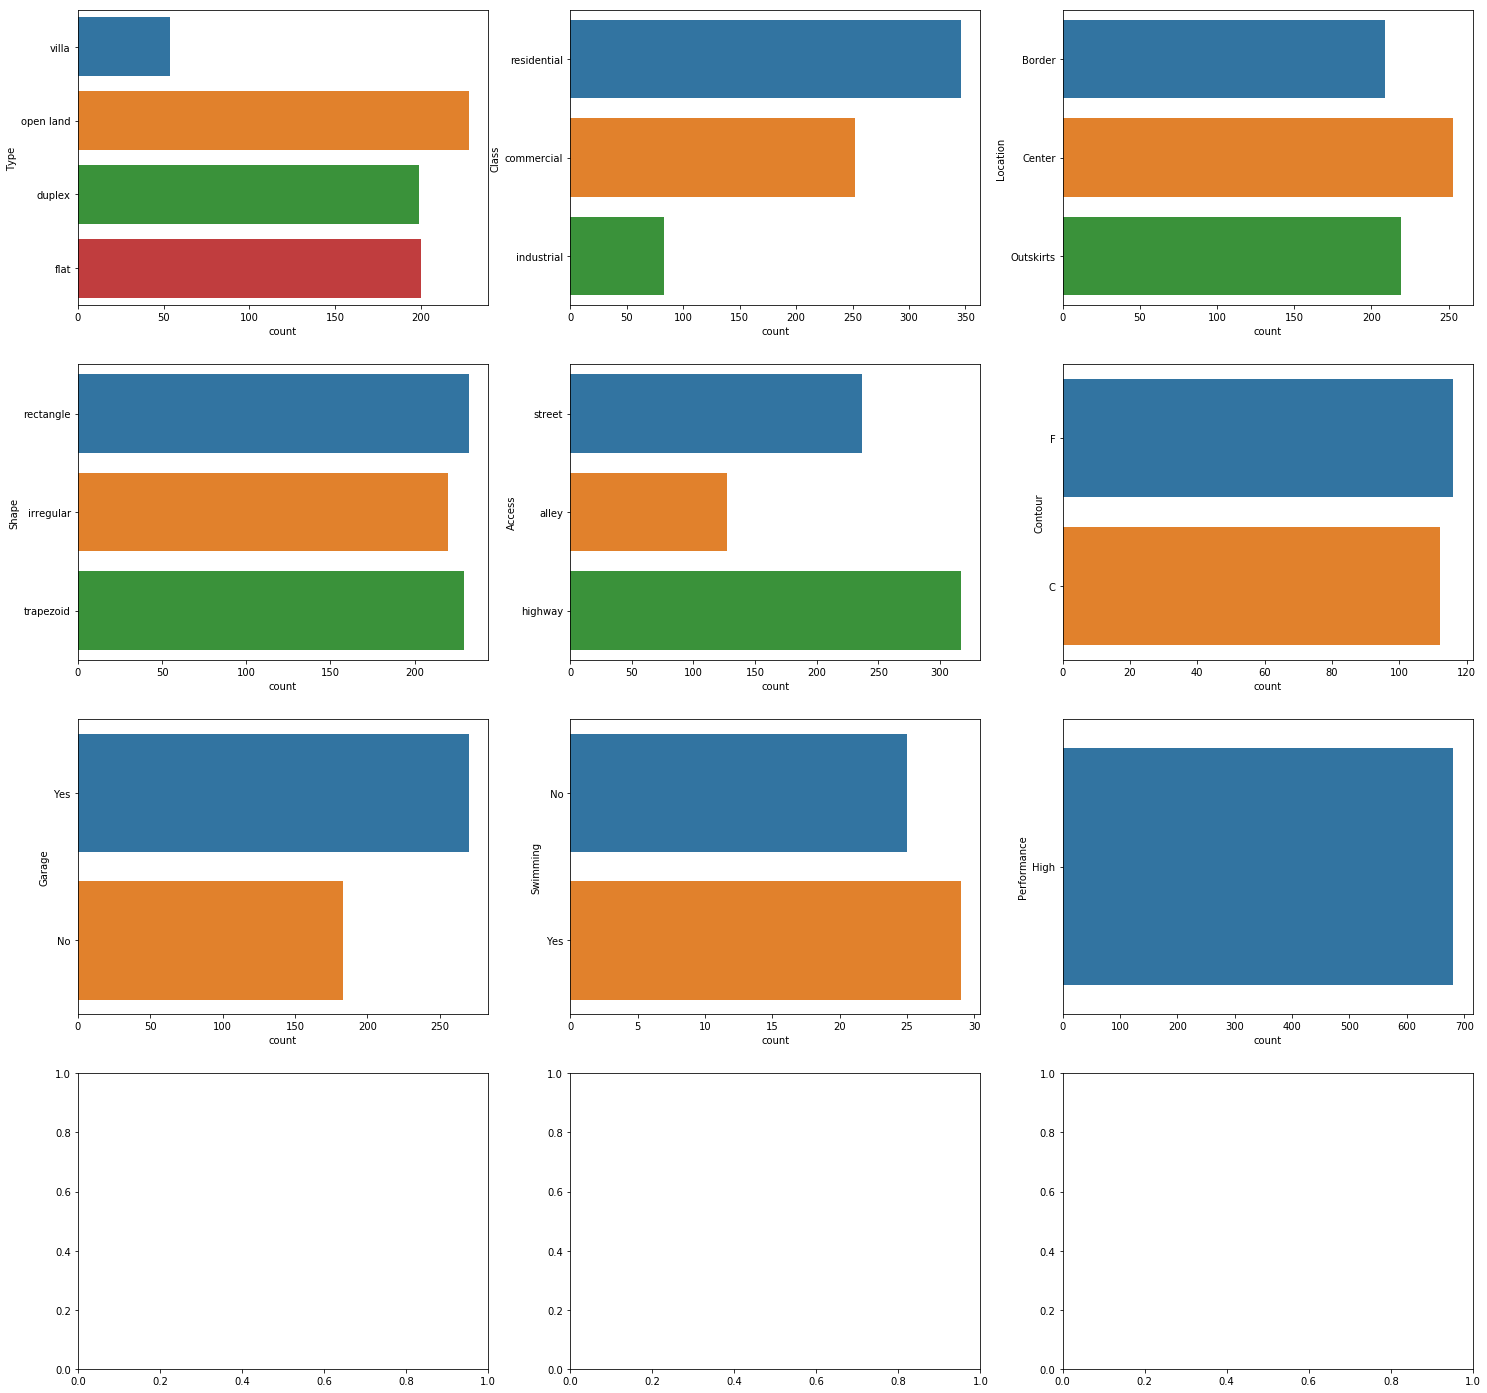

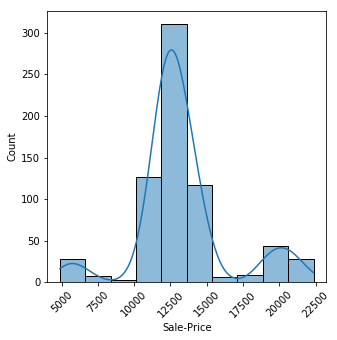

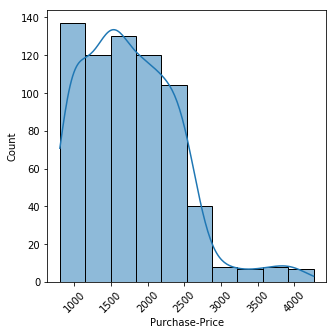

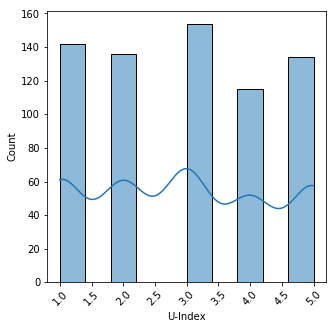

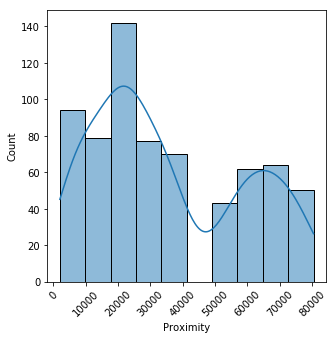

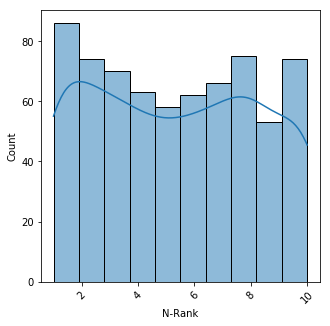

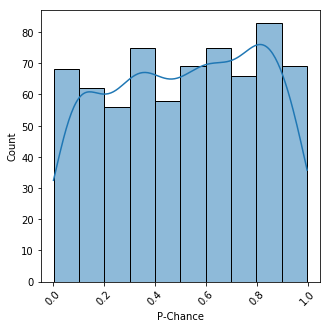

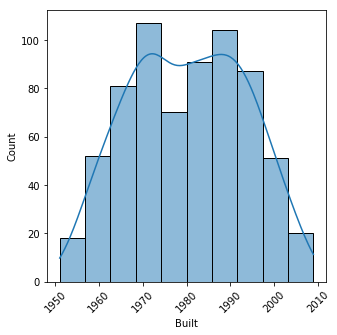

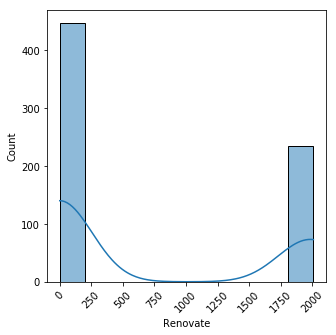

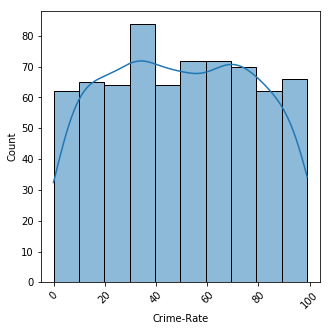

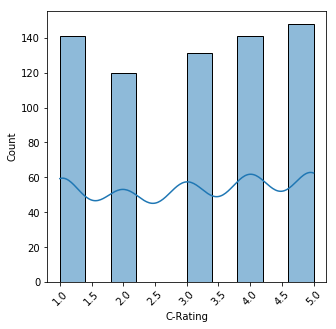

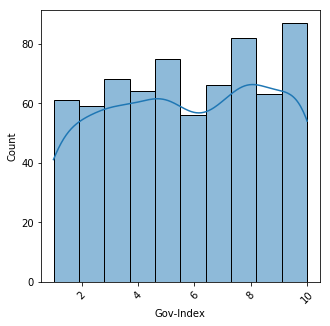

According to the plots,
 1): The majority of High performing estates are not Villas.
 2): The vast majority of high performing estates are residential and commercial.
 3): Most of high performing estates have sale price of around 12,500 Mil SAR, and purchase price of the ranges (1,000 to less than 4,000) Mil SAR.
 4): Most of the high performing estates were built in the period from 1960 to 2000.
 5): Most of High performing estates are accesible through high-ways, and street.
 6): The vast majority of high performing estates have garages. 



In [6]:
location_c=df.loc[:,"Performance"]#Get performance column.
high_performance_estates=df[location_c=="High"]
high_performance_estates=high_performance_estates.drop(columns=['Purchase-Date'])
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
num_columns = high_performance_estates.select_dtypes(exclude='object').columns
cat_columns = high_performance_estates.select_dtypes(include='object').columns
nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=high_performance_estates,ax=axes.flatten()[ind])
plt.show()
num_columns = high_performance_estates.select_dtypes(exclude='object').columns
for col in num_columns:
    plt.figure(figsize=(5,5))
    sns.histplot(x=col,bins=10,kde=True,data=high_performance_estates)
    plt.xticks(rotation=45)
    plt.show()
print(f"According to the plots,\n 1): The majority of High performing estates are not Villas.\n 2): The vast majority of high performing estates are residential and commercial.\n 3): Most of high performing estates have sale price of around 12,500 Mil SAR, and purchase price of the ranges (1,000 to less than 4,000) Mil SAR.\n 4): Most of the high performing estates were built in the period from 1960 to 2000.\n 5): Most of High performing estates are accesible through high-ways, and street.\n 6): The vast majority of high performing estates have garages. \n")

## Task-7

In [77]:
#If we assume that all the input variables are related to the output, then we can use OLS to show that they are relevant
import pandas as pd
import numpy as np
df_X = pd.read_csv('Group49/Group_49_B.csv', delimiter =',')
df_X.head()
from sklearn.preprocessing import LabelEncoder
df_X.drop(['Purchase-Date'], axis=1, inplace=True)
Cat_columns=df_X.select_dtypes(include="object").columns.tolist()
df_X = df_X.fillna('NaN')
for x in Cat_columns:    
    #df_X = pd.get_dummies(df_X, columns=[x],drop_first=True)
    encoder1 = LabelEncoder()
    encoder1.fit(df_X[x])
    df_X[x]=encoder1.transform(df_X[x])

Xo = df_X.iloc[:,1:].values # The input variables
y = df_X.iloc[:,0].values   # The output variable
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(Xo, y)
best_beta =  np.round(regr.coef_,2)
best_beta_0 = np.round(regr.intercept_,2)

print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())


The best values for the estimates are : -42321.29 [0.21, -1991.97, -188.11, 264.56, 406.26, 11.38, -0.02, -29.69, 272.38, 30.57, -0.07, -268.72, -6.82, 58.0, 70.14, -1419.06, -1293.26, 51.23]


## Task-8

In [64]:
# Since some of the variables are correlated, we use Ridge analysis.
from sklearn.linear_model import Ridge
r = Ridge(alpha=500)
r.fit(Xo, y)
beta =  np.round(r.coef_,2)
beta_0 = np.round(r.intercept_,2)
print(f'The best values for the estimates are :', beta_0, beta.tolist())

The best values for the estimates are : -39784.78 [0.22, -1772.37, -286.53, 225.78, 352.18, 13.72, -0.02, -31.61, 127.52, 28.97, -0.15, -226.46, -6.9, 54.64, 69.87, -1056.44, -1292.03, 41.6]


## Task-9

In [65]:
#Since some of the variables may not be relevant to the output variable, we use Lasso.
from sklearn.linear_model import Lasso
regl = Lasso(alpha=0.5) # set alpha to 0.5
regl.fit(Xo, y)
best_beta =  np.round(regl.coef_,2)
best_beta_0 = np.round(regl.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -42292.74 [0.21, -1991.43, -187.84, 263.55, 405.51, 11.17, -0.02, -29.64, 266.4, 30.56, -0.07, -267.96, -6.82, 57.72, 70.07, -1417.31, -1293.68, 49.19]


## Task-10

In [79]:
#Use The data given in B as a training data and the data given in C as a testing Data..
#-------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
df_C = pd.read_csv('Group49/Group_49_C.csv', delimiter =',')
from sklearn.preprocessing import LabelEncoder
df_C.drop(['Purchase-Date'], axis=1, inplace=True) # Since we are using The data given in B as a training data, and the data given in B is trained with out the "Purchase date" column, we have to drop it as well from this set of data.
Cat_columns=df_C.select_dtypes(include="object").columns.tolist()
df_C = df_C.fillna('NaN')
for x in Cat_columns:  
    #df_C = pd.get_dummies(df_C, columns=[x],drop_first=True)
    encoder1 = LabelEncoder()     # To calculate the include the categorical into the regression
    encoder1.fit(df_C[x])
    df_C[x]=encoder1.transform(df_C[x])

Xo = df_C.iloc[:,1:].values # The input variables
y = df_C.iloc[:,0].values   # The output variable
#-------------------------------------------------------------------------------------
# Generate Train - Test splits
from sklearn.model_selection import train_test_split
X = df_X.iloc[:,1:].values
y = df_X.iloc[:, 0].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Scaling the Train - Test splits
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,1:]
y_train = A_train[:,0]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,1:]
y_test = A_test[:,0]

from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))
#Since Lasso is the best model in this case, we use it to predict the estimated sale-price in df_C.
y_pred3=reg3.predict(Xo)
print("Sale-price Predictions:")
print(y_pred3)
#The predicted values are not quite accurate due to the large MSE.

The MSE using OLS is: 0.8510102875026048
The MSE using Ridge is: 0.8509372343072158
The MSE using Lasso is: 0.8509207239316668
Sale-price Predictions:
[2425.8265599  2544.93905944 2138.78381885 ... 1948.79240608 1048.64364725
 1677.54003265]
